## Exploratory Data Analysis on Google Trends data

Description of Data: This is a curated dataset of Google Trends over the years. Every year, Google releases the trending search queries all over the world in various categories. It has trends from 2001 to 2020.

Trends data is an unbiased sample of Google search data. It’s anonymized (no one is personally identified), categorized (determining the topic for a search query) and aggregated (grouped together). This allows us to measure interest in a particular topic across search, from around the globe, right down to city-level geography.Trends data can provide a powerful lens into what Google users are curious about and how people around the world react to important events.

Source:
https://www.kaggle.com/datasets/dhruvildave/google-trends-dataset
https://medium.com/google-news-lab/what-is-google-trends-data-and-what-does-it-mean-b48f07342ee8


### Import required libraries and the dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('trends.csv')
df.head(10)

,location,year,category,rank,query
0,Global,2001,Consumer Brands,1,Nokia
1,Global,2001,Consumer Brands,2,Sony
2,Global,2001,Consumer Brands,3,BMW
3,Global,2001,Consumer Brands,4,Palm
4,Global,2001,Consumer Brands,5,Adobe
5,Global,2001,Men,1,Nostradamus
6,Global,2001,Men,2,Osama bin Laden
7,Global,2001,Men,3,Eminem
8,Global,2001,Men,4,Michael Jackson
9,Global,2001,Men,5,Howard Stern


#### Preview and Pre-Processing

In [2]:
df.sample(5)

,location,year,category,rank,query
16130,Uruguay,2016,Búsquedas,1,Pokémon GO
9726,Singapore,2014,Singapore News,2,GST voucher 2014
15436,Sweden,2016,Personer,2,Hillary Clinton
15803,United Kingdom,2016,Politicians,4,Hilary Clinton
7815,United States,2013,NBA Teams,1,Miami Heat


In [3]:
df['year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [4]:
df['category'].unique()

array(['Consumer Brands', 'Men', 'Movies', ..., 'Cách Làm',
       'Như Thế Nào?', 'Là Gì?'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26955 entries, 0 to 26954
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   location  26955 non-null  object
 1   year      26955 non-null  int64 
 2   category  26955 non-null  object
 3   rank      26955 non-null  int64 
 4   query     26955 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.0+ MB


In [6]:
df.nunique()

location       83
year           20
category     2450
rank            5
query       18431
dtype: int64

#### No missing data or inconsistent datatypes observed

## Visualization
#### Lets start with getting a graph for all numerical values

C:\Users\mail2\AppData\Local\Temp\ipykernel_2804\3953111237.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(bins=10, ax=ax)


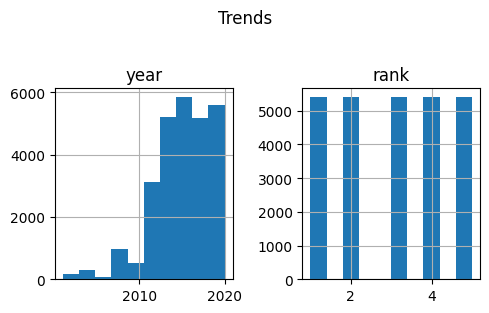

In [7]:
fig = plt.figure(figsize=(5,3)); ax = fig.gca()
df.hist(bins=10, ax=ax)
plt.suptitle('Trends', y=1.03)    # this adds a "super" title and places it well
plt.tight_layout()   # add some space between the plots

### Interpretation #1 - Google was used as main and dominant search provider in the later parts of 2000s - that explains the first graph

### Since consumer brands was highlighted in the earlier df.head() function for the initial years of the search, lets take a deeper dive into all "consumer" categories



In [21]:
# create a dataset with just "consumer" categories
df_temp = df.loc[(df['category'] == "Consumer Brands") | (df['category'] == "Consumer Tech") | (df['category'] == "Consumer Technology") | (df['category'] == "Consumer Electronics")]
df1 = df_temp.groupby(df['category']).nunique()
df1

,location,year,category,rank,query
category,,,,,
Consumer Brands,1,4,1,5,14
Consumer Electronics,2,5,1,5,30
Consumer Tech,3,4,1,5,24
Consumer Technology,1,1,1,5,5


<AxesSubplot: xlabel='year', ylabel='query'>

c:\Users\mail2\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from current font.
  func(*args, **kwargs)
c:\Users\mail2\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 3615 (\N{THAI CHARACTER FO FAN}) missing from current font.
  func(*args, **kwargs)
c:\Users\mail2\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from current font.
  func(*args, **kwargs)
c:\Users\mail2\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 3610 (\N{THAI CHARACTER BO BAIMAI}) missing from current font.
  func(*args, **kwargs)
c:\Users\mail2\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 3640 (\N{THAI CHARACTER SARA U}) missing from current font.
  func

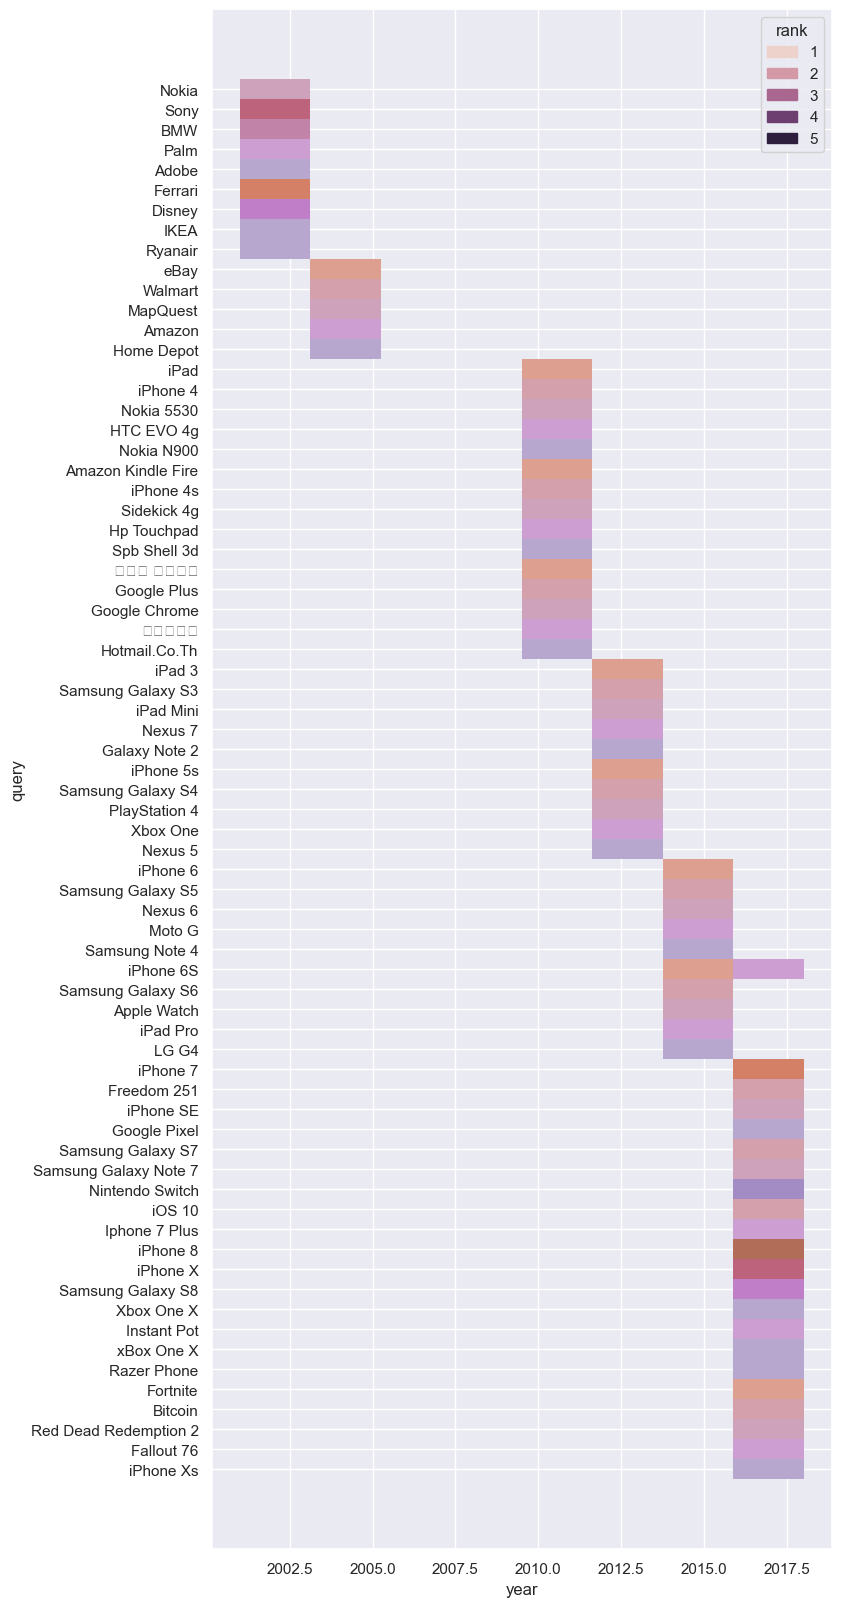

In [26]:
#visualize the queries from the above consumer categories
sns.set(rc={'figure.figsize':(8,20)})
sns.histplot(data=df_temp, y = 'query', x = 'year', hue = 'rank')

### Interpretation 2: The above graphs present an interesting story on how we shifted drastically from cars, Disney, IKEA, Ryan air kind of consumer brands initially into dominant "mobile phone devices" category - shows how mobiles have took over our lives in a certain way! The sheer number of mobile devices search is staggering across all the years. Other notable mentions goes to game stations (playstation/xbox etc), Instant Pot and Bitcoin. 

### Lets visualize it by consumer categories

<AxesSubplot: xlabel='year', ylabel='category'>

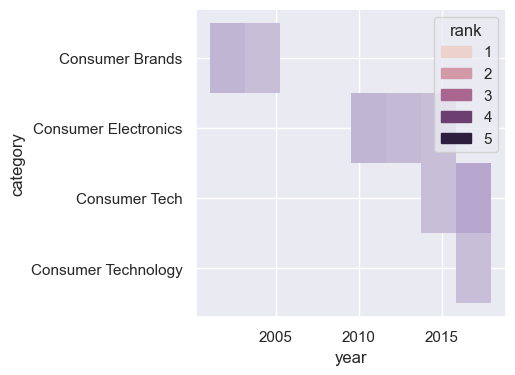

In [28]:
sns.set(rc={'figure.figsize':(4,4)})
sns.histplot(data=df_temp, y = 'category', x = 'year', hue = 'rank')

### Interpretation 3 - Indeed, the shift has moved from Consumer brands to Electronics to Technology.

### Lets move beyond consumer categories to check the top 20 categories that were searched over the years

<AxesSubplot: xlabel='count', ylabel='category'>

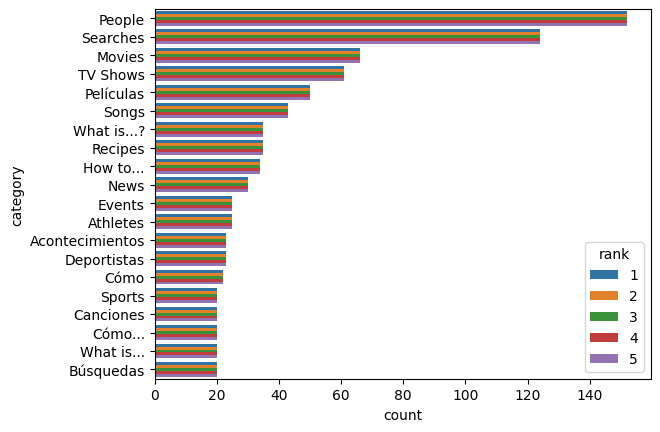

In [ ]:
sns.countplot(data=df, y = 'category', hue = 'rank',order=df.category.value_counts().iloc[:20].index)

### Interpretation #4 - Consumer categories did not reach the top 20 list. Could this mean that we have become less materialistic or is it the case that we used different mediums to search for consumer goods (amazon/apple store/fb marketplace etc.) instead of Google search - Perhaps another EDA on consumer brand search engines may answer. Equally interesting insight is that the top category goes to "People" - we are indeed very curious about others! Another notable insight is that 4 out of the top 6 categories are related to movies/films(peliculas)/songs. This tells us that we as a human race are very interested in entertainment!

### Lets take a look at the people we are interested in over the years

In [41]:
#creating a temp datframe to select the People Category
df_people = df.loc[(df['category'] == "People")]
df_people

,location,year,category,rank,query
1990,Global,2010,People,1,Justin Bieber
1991,Global,2010,People,2,Katy Perry
1992,Global,2010,People,3,Selena Gomez
1993,Global,2010,People,4,Kim Kardashian
1994,Global,2010,People,5,Eminem
...,...,...,...,...,...
26710,United States,2020,People,1,Joe Biden
26711,United States,2020,People,2,Kim Jong Un
26712,United States,2020,People,3,Kamala Harris
26713,United States,2020,People,4,Jacob Blake


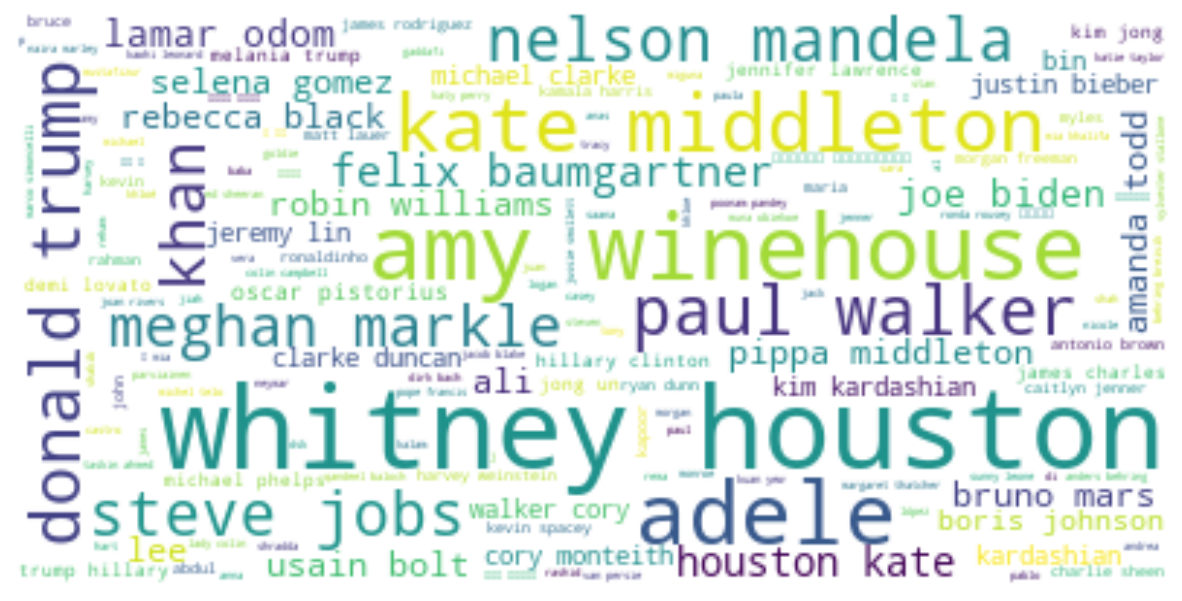

In [42]:
#Visualizing through wordcloud
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

word_string=" ".join(df_people['query'].str.lower())

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(word_string)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Interpretation 5 - Most of the people we are interested are not scientists, philosphers or entrepreneurs(barring Steve Jobs) unfortunately. It appears that we are influenced heavily by Celebrity Artists or Politicians. A sombre note is that a number of these celebrity searches relate to artists who has passed away, but it still shows the attachment we have towards celebrity artists

### Given the last few years have been taken over by Covid-19, lets take a look at searches during year 2020 as the dataset ends at 2020

In [54]:
# create a dataset with just "consumer" categories
df_temp2 = df.loc[(df['year'] == 2020) & ((df['category'] == 'News')| (df['category'] == 'Searches'))]
# df2 = df_temp2.groupby(df['year']).nunique()
# df2
df_temp2

,location,year,category,rank,query
23975,Global,2020,Searches,1,Coronavirus
23976,Global,2020,Searches,2,Election results
23977,Global,2020,Searches,3,Kobe Bryant
23978,Global,2020,Searches,4,Zoom
23979,Global,2020,Searches,5,IPL
23980,Global,2020,News,1,Coronavirus
23981,Global,2020,News,2,Election results
23982,Global,2020,News,3,Iran
23983,Global,2020,News,4,Beirut
23984,Global,2020,News,5,Hantavirus


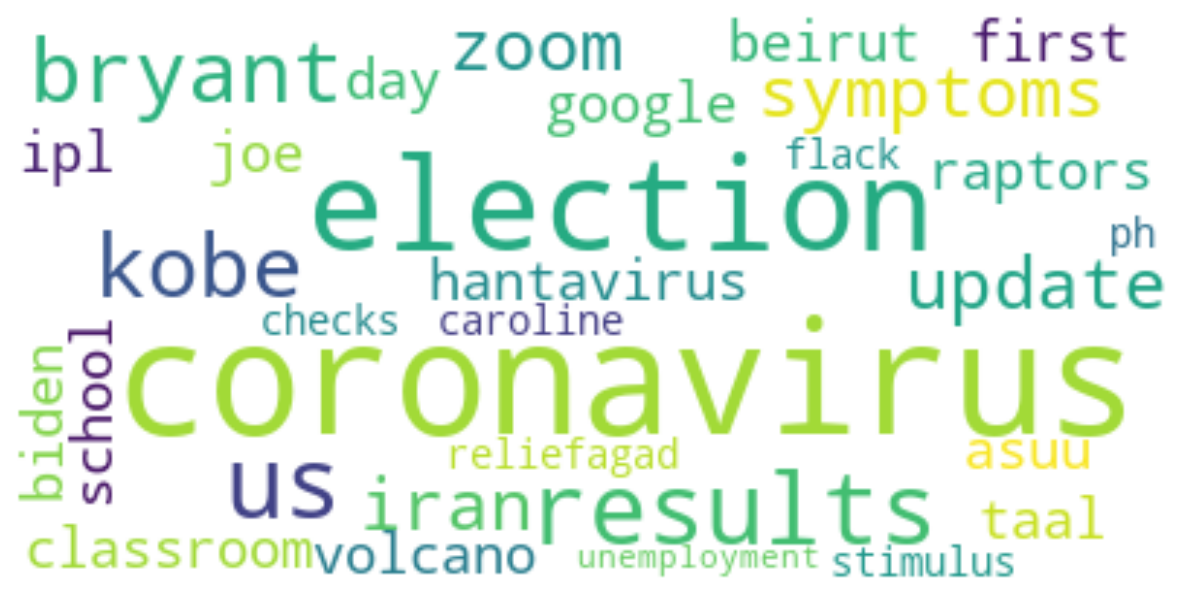

In [55]:
word_string=" ".join(df_temp2['query'].str.lower())

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(word_string)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Interpretation 6 - While Coronavirus dominated the Searches and News, the other notable themes were around zoom, stimulus, checks, unemployment and US elections. It indicates the collective frame of our minds that when the world gets stopped due to Covid-19, we try finding ways to connect via zoom, help others and the economy via stimulus and checks.

### Interpretation 7 - In conclusion, based on this Google trends data analysis and the collective searches across the globe between 2001 - 2020, our search priorities have been dominated by mobile devices, gaming technology, movies while we are consumed by our interest in Celebrities and Politicians. The common thread that potentially binds all these themes is how its all centred towards our entertainment by people via movies, games or the great political theatre! And when we don't actively search for this entertainment, we search for platforms for entertainment i.e., 'mobile devices'. So, this analysis indicates that we use Search for entertainment or platforms of entertainment!